AUTHOR : K. K. N. SHYAM SATHVIK <br>
ROLL NO : B22EE036

#### Imports

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
import warnings

# Linear Discriminant Analysis (LDA)

### Fetch Data

In [31]:
data_url = url = 'https://raw.githubusercontent.com/anandmishra22/PRML-Spring-2023/main/programmingAssignment/PA-4/data.csv'
data = pd.read_csv(data_url, header = None)
print(data)

             0         1    2
0     1.861898  2.722963  0.0
1     2.235896 -2.157721  0.0
2     1.692817  0.995896  0.0
3     2.584343  3.722926  0.0
4     1.689087 -0.838214  0.0
...        ...       ...  ...
1995  6.234800  5.117729  1.0
1996  6.803708  3.127105  1.0
1997  4.466789  3.444926  1.0
1998  5.658980  4.043341  1.0
1999  1.980180  7.158152  1.0

[2000 rows x 3 columns]


In [32]:
# Converting to numpy array
X = data.values

In [33]:
print(X)

[[ 1.86189843  2.72296272  0.        ]
 [ 2.23589604 -2.15772062  0.        ]
 [ 1.69281688  0.99589606  0.        ]
 ...
 [ 4.46678886  3.44492577  1.        ]
 [ 5.65897988  4.04334073  1.        ]
 [ 1.98017955  7.15815205  1.        ]]


In [34]:
print(X.shape)

(2000, 3)


## Task 1: Compute Terms

### Restructured Helper Code

In [35]:
def ComputeMeanDiff(X):
    # Separate the samples by class
    class_zero = X[X[:, 2] == 0][:, :2]
    class_one = X[X[:, 2] == 1][:, :2]
    # means of each class
    mean_zero = np.mean(class_zero, axis=0)
    mean_one = np.mean(class_one, axis=0)
    # difference of class wise means
    mean_diff = mean_zero - mean_one
    return mean_diff

In [36]:
def ComputeSW(X):
    # Separate the samples by class
    class_zero = X[X[:, 2] == 0][:, :2]
    class_one = X[X[:, 2] == 1][:, :2]
    # scatter matrices for each class
    S_zero = np.dot((class_zero - np.mean(class_zero, axis=0)).T, (class_zero - np.mean(class_zero, axis=0)))
    S_one = np.dot((class_one - np.mean(class_one, axis=0)).T, (class_one - np.mean(class_one, axis=0)))
    # total within-class scatter matrix
    S_w = S_zero + S_one
    return S_w

In [37]:
def ComputeSB(X):
    # overall mean
    overall_mean = np.mean(X[:, :2], axis=0)
    # means of each class
    mean_diff = ComputeMeanDiff(X)
    mean_zero = overall_mean - mean_diff / 2
    mean_one = overall_mean + mean_diff / 2
    # between-class scatter matrix
    S_b = np.outer(mean_diff, mean_diff)
    return S_b

In [38]:
def GetLDAProjectionVector(X):
    # Get SW and SB
    S_w = ComputeSW(X)
    S_b = ComputeSB(X)
    # inverse of Sw
    S_w_inv = np.linalg.inv(S_w)
    # Sw^-1 dot Sb
    S_w_inv_Sb = np.dot(S_w_inv, S_b)
    # Compute the eigenvectors and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(S_w_inv_Sb)
    # Get the eigenvector corresponding to the highest eigenvalue
    max_index = np.argmax(eigenvalues)
    w = eigenvectors[:, max_index]
    return w

In [39]:
def project(x, y, w):
    # Project the point (x, y) using the LDA projection vector w
    point = np.array([x, y])
    projection = np.dot(point, w)
    return projection

## Task 2: LDA Projection Vector

#### Plotting the given data

In [40]:
def plot_original_data(X):
    df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2', 'Class'])
    sns.FacetGrid(df, hue="Class", height=6).map(plt.scatter, 'Feature 1', 'Feature 2').add_legend()
    plt.title('Original Data')
    plt.show()

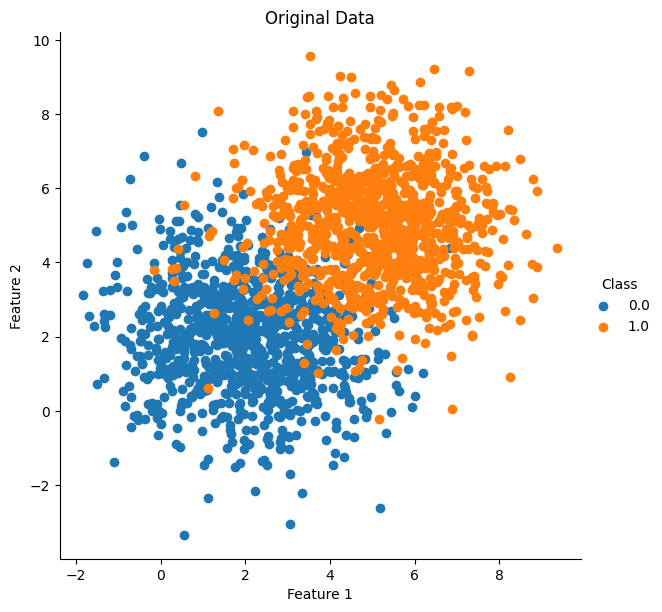

In [41]:
plot_original_data(X)

#### Projection Vector

In [42]:
w = GetLDAProjectionVector(X)

In [43]:
print(w)

[0.71310953 0.70105263]


In [44]:
def plot_original_data_with_projection(X, w):
    df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2', 'Class'])
    sns.FacetGrid(df, hue="Class", height=6).map(plt.scatter, 'Feature 1', 'Feature 2').add_legend()
    plt.title('Original Data with Projection Vector')
    max_feature_values = df[['Feature 1', 'Feature 2']].max().max()
    w_scaled = w * max_feature_values
    plt.quiver(0, 0, w_scaled[0], w_scaled[1], angles='xy', scale_units='xy', color='green', scale=1, label='Projection Vector w')
    plt.legend()
    plt.show()

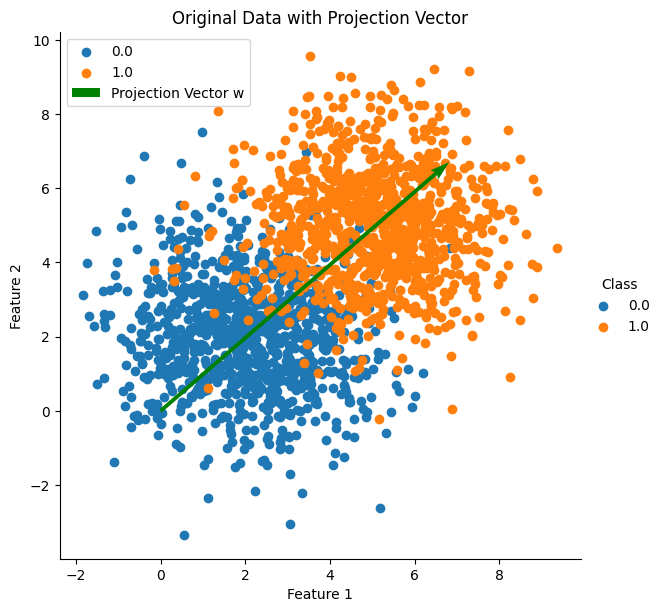

In [45]:
plot_original_data_with_projection(X, w)

### Transformed data

In [46]:
def lda_transform(X):
    w = GetLDAProjectionVector(X)     # fetch the LDA projection
    projected_data = np.array([project(x[0], x[1], w) for x in X[:, :2]])   # project the data using the projection vector
    return projected_data, X[:, -1]

In [47]:
projected_data, y = lda_transform(X)

In [48]:
def plot_transformed_data(projected_data, y):
    # Create a DataFrame for the transformed data
    df_transformed = pd.DataFrame({'LDA Projected Data': projected_data, 'Class': y})

    # Plotting the transformed data
    sns.scatterplot(x='LDA Projected Data', y=np.zeros_like(projected_data), hue='Class', data=df_transformed, palette="deep")
    plt.title('LDA Transformed Data')
    plt.ylabel('')  # Removing y-axis label as it's not meaningful in this context
    plt.show()

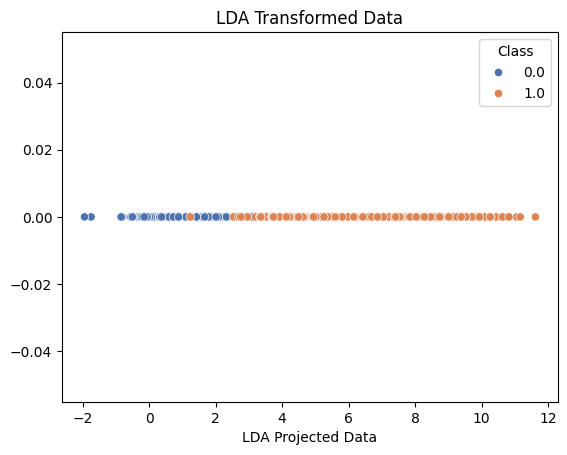

In [49]:
plot_transformed_data(projected_data, y)

#### The seperability can be clearly seen in the above projected data.

In [50]:
def plot_transformed_data_with_distribution(projected_data, y):
    # Create a DataFrame for the transformed data
    df_transformed = pd.DataFrame({'LDA Projected Data': projected_data, 'Class': y})

    # Initialize a grid for the joint plot
    grid = sns.JointGrid(data=df_transformed, x='LDA Projected Data', y=np.zeros_like(projected_data), hue='Class', palette="deep")

    # Create scatter plot
    grid.plot_joint(sns.scatterplot)

    # Add KDE plots for distribution on the axis
    grid.plot_marginals(sns.kdeplot, common_norm=False)

    plt.subplots_adjust(top=0.9)
    grid.fig.suptitle('LDA Transformed Data with Distribution')

    # Due to the nature of the projection, we may not have a meaningful y-axis distribution.
    # Therefore, only the x-axis distribution is shown.
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1889: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


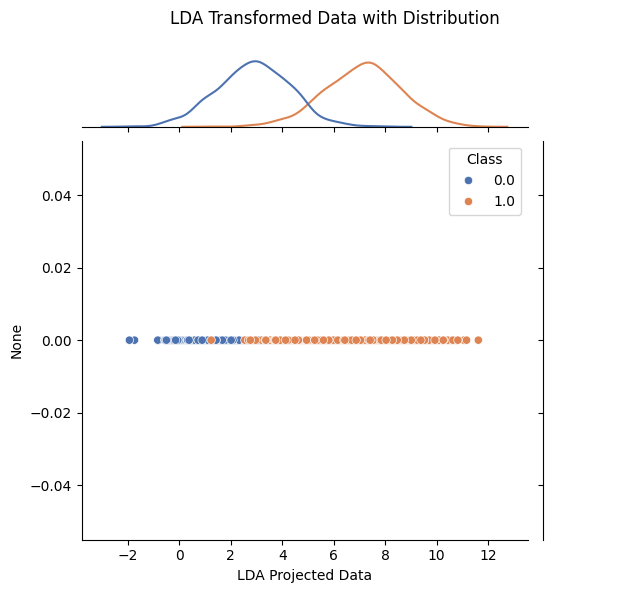

In [51]:
plot_transformed_data_with_distribution(projected_data, y)

## Task 3: 1-NN Classifier Performance

### Task Specific Imports

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### Data Pre-Processing

#### Seperating out the features

In [53]:
X = X[:, :2]
X_projected = projected_data
print(X)
print(y)
print(X_projected)

[[ 1.86189843  2.72296272]
 [ 2.23589604 -2.15772062]
 [ 1.69281688  0.99589606]
 ...
 [ 4.46678886  3.44492577]
 [ 5.65897988  4.04334073]
 [ 1.98017955  7.15815205]]
[0. 0. 0. ... 1. 1. 1.]
[3.2366777  0.08176306 1.90533941 ... 5.600384   6.87006716 6.43032625]


#### Train-Test Split

In [54]:
def split_data(X, X_projected, y):
    """
    Splits the data into training and test sets for both original and projected data.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    X_projected_train, X_projected_test = train_test_split(X_projected, test_size=0.3, random_state=42)

    return X_train, X_test, y_train, y_test, X_projected_train, X_projected_test

In [55]:
X_train, X_test, y_train, y_test, X_projected_train, X_projected_test = split_data(X, X_projected, y)

#### Training on 1-NN Classifier

In [56]:
def train_test_knn(X_train, y_train, X_test, y_test):
    """
    Trains and tests a 1-NN classifier using the given training and test data.
    Returns performance metrics.
    """
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    return accuracy, report, confusion

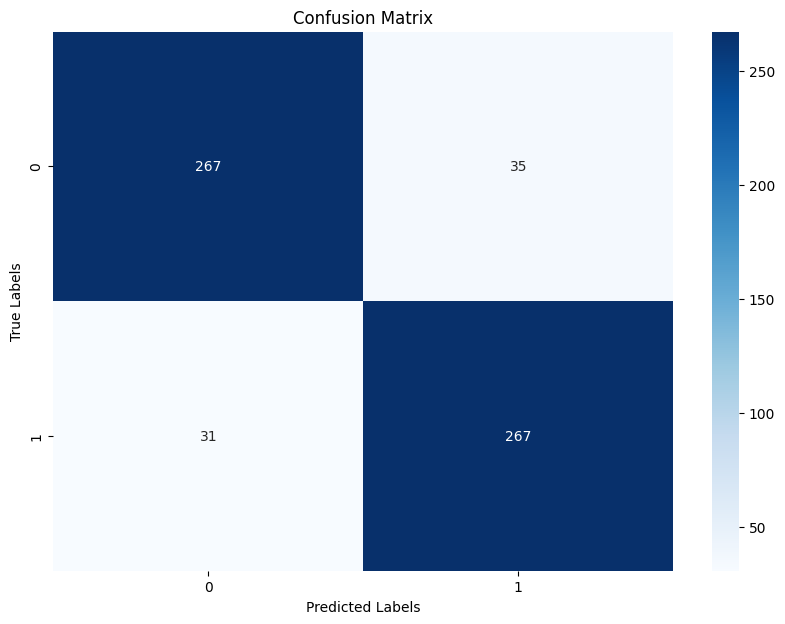

In [57]:
# Original Data
accuracy_original, report_original, confusion_original = train_test_knn(X_train, y_train, X_test, y_test)

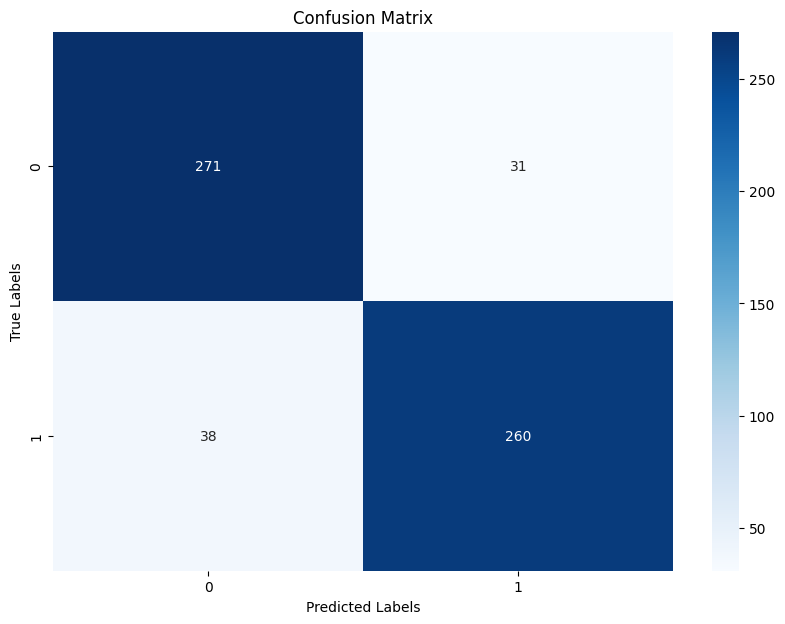

In [58]:
# Projected Data
accuracy_projected, report_projected, confusion_projected = train_test_knn(X_projected_train.reshape(-1, 1), y_train, X_projected_test.reshape(-1, 1), y_test)

In [59]:
print("Original Data 1-NN Classifier Performance:")
print("Accuracy:", accuracy_original)
print("Classification Report:\n", report_original)
print("Confusion Matrix:\n", confusion_original)

Original Data 1-NN Classifier Performance:
Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.88      0.89       302
         1.0       0.88      0.90      0.89       298

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600

Confusion Matrix:
 [[267  35]
 [ 31 267]]


In [60]:
print("\nProjected Data 1-NN Classifier Performance:")
print("Accuracy:", accuracy_projected)
print("Classification Report:\n", report_projected)
print("Confusion Matrix:\n", confusion_projected)


Projected Data 1-NN Classifier Performance:
Accuracy: 0.885
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.90      0.89       302
         1.0       0.89      0.87      0.88       298

    accuracy                           0.89       600
   macro avg       0.89      0.88      0.88       600
weighted avg       0.89      0.89      0.88       600

Confusion Matrix:
 [[271  31]
 [ 38 260]]




---



# Naive Bayes

#### Specific Imports

In [61]:
import pprint
from sklearn.model_selection import train_test_split

#### Data Pre-Processing

In [62]:
data_url = 'https://raw.githubusercontent.com/anandmishra22/PRML-Spring-2023/main/programmingAssignment/PA-4/naive_bayes.csv'
data = pd.read_csv(data_url)

In [63]:
display(data)

,Outlook,Temp,Humidity,Windy,Play
0,Rainy,Hot,High,f,no
1,Rainy,Hot,High,t,no
2,Overcast,Hot,High,f,yes
3,Sunny,Mild,High,f,yes
4,Sunny,Cool,Normal,f,yes
5,Sunny,Cool,Normal,t,no
6,Overcast,Cool,Normal,t,yes
7,Rainy,Mild,High,f,no
8,Rainy,Cool,Normal,f,yes
9,Sunny,Mild,Normal,f,yes


In [64]:
data.describe()

,Outlook,Temp,Humidity,Windy,Play
count,14,14,14,14,14
unique,3,3,2,2,2
top,Rainy,Mild,High,f,yes
freq,5,6,7,8,9


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Outlook   14 non-null     object
 1   Temp      14 non-null     object
 2   Humidity  14 non-null     object
 3   Windy     14 non-null     object
 4   Play      14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


## Task 0: Train-Test Split

In [66]:
def split_dataset(data):
    """
    Splits the dataset into training and testing sets.
    """
    train_df, test_df = train_test_split(data, test_size=2/14, random_state=42)
    return train_df, test_df

In [67]:
train, test = split_dataset(data)

In [68]:
display(train)

,Outlook,Temp,Humidity,Windy,Play
0,Rainy,Hot,High,f,no
12,Overcast,Hot,Normal,f,yes
5,Sunny,Cool,Normal,t,no
8,Rainy,Cool,Normal,f,yes
2,Overcast,Hot,High,f,yes
1,Rainy,Hot,High,t,no
13,Sunny,Mild,High,t,no
4,Sunny,Cool,Normal,f,yes
7,Rainy,Mild,High,f,no
10,Rainy,Mild,Normal,t,yes


In [69]:
display(test)

,Outlook,Temp,Humidity,Windy,Play
9,Sunny,Mild,Normal,f,yes
11,Overcast,Mild,High,t,yes


## Task 1: Prior Probabilities

In [70]:
def calculate_prior_probabilities(train):
    """
    Calculates the prior probabilities of the target variable.
    """
    prior_play_yes = len(train[train['Play'] == 'yes']) / len(train['Play'])
    prior_play_no = 1 - prior_play_yes
    return prior_play_yes, prior_play_no

In [71]:
prior_probabilities = calculate_prior_probabilities(train)

In [72]:
print(prior_probabilities)

(0.5833333333333334, 0.41666666666666663)


In [73]:
print(7/12) # verified
print(5/12)

0.5833333333333334
0.4166666666666667


## Task 2: Likelihood Probabilities

In [74]:
def calculate_likelihood_probabilities(df):
    """
    Calculates the likelihood probabilities for each feature given the class.

    Returns:
        likelihood_probabilities (dict): A dictionary containing likelihood probabilities.
    """
    likelihood_probabilities = {}
    features = ['Outlook', 'Temp', 'Humidity', 'Windy']
    for feature in features:
        likelihood_probabilities[feature] = {}
        u = df[feature].unique()
        # print(u)
        for value in df[feature].unique():
            for play in ['yes', 'no']:
                count = len(df[(df[feature] == value) & (df['Play'] == play)])
                total = len(df[df['Play'] == play])
                likelihood_probabilities[feature][(value, play)] = count / total
    return likelihood_probabilities

In [75]:
likelihood_probabilities = calculate_likelihood_probabilities(train)

In [76]:
pprint.pprint(likelihood_probabilities)

{'Humidity': {('High', 'no'): 0.8,
              ('High', 'yes'): 0.2857142857142857,
              ('Normal', 'no'): 0.2,
              ('Normal', 'yes'): 0.7142857142857143},
 'Outlook': {('Overcast', 'no'): 0.0,
             ('Overcast', 'yes'): 0.42857142857142855,
             ('Rainy', 'no'): 0.6,
             ('Rainy', 'yes'): 0.2857142857142857,
             ('Sunny', 'no'): 0.4,
             ('Sunny', 'yes'): 0.2857142857142857},
 'Temp': {('Cool', 'no'): 0.2,
          ('Cool', 'yes'): 0.42857142857142855,
          ('Hot', 'no'): 0.4,
          ('Hot', 'yes'): 0.2857142857142857,
          ('Mild', 'no'): 0.4,
          ('Mild', 'yes'): 0.2857142857142857},
 'Windy': {('f', 'no'): 0.4,
           ('f', 'yes'): 0.7142857142857143,
           ('t', 'no'): 0.6,
           ('t', 'yes'): 0.2857142857142857}}


#### Debugging Code

In [77]:
# display(train)

In [78]:
pd.crosstab(train['Outlook'], train['Play'])

Play,no,yes
Outlook,,
Overcast,0,3
Rainy,3,2
Sunny,2,2


In [79]:
pd.crosstab(train['Humidity'], train['Play'])

Play,no,yes
Humidity,,
High,4,2
Normal,1,5


In [80]:
print(2/7)

0.2857142857142857


## Task 3: Posterior Probabilities

In [81]:
def calculate_posterior_probabilities(row, priors, likelihoods):
    """
    Calculates the posterior probabilities of the target variable.
    """
    prior_play_yes = priors[0]
    prior_play_no = priors[1]
    for feature in ['Outlook', 'Temp', 'Humidity', 'Windy']:
        prior_play_yes *= likelihoods[feature][(row[feature], 'yes')]
        prior_play_no *= likelihoods[feature][(row[feature], 'no')]
    return prior_play_yes, prior_play_no

#### Working

In [82]:
y, n = calculate_posterior_probabilities(train.iloc[0], prior_probabilities, likelihood_probabilities)

In [83]:
print(y)
print(n)

0.009718172983479104
0.032


## Task 4: Make Predictions

In [84]:
def make_predictions(test_df, priors, likelihoods):
    """
    Returns predictions given a row.
    """
    predictions = []
    for _, row in test_df.iterrows():
        probs_yes, probs_no = calculate_posterior_probabilities(row, priors, likelihoods)
        prediction = 'yes' if probs_yes > probs_no else 'no'
        predictions.append(prediction)
    return predictions

In [85]:
make_predictions(test, prior_probabilities, likelihood_probabilities)

['yes', 'yes']

## Task 5: Laplace Smoothing

In [86]:
def calculate_likelihood_probabilities_with_laplace(df):
    """
    Calculates the likelihood probabilities for each feature given the class.

    Returns:
        likelihood_probabilities (dict): A dictionary containing likelihood probabilities.
    """
    likelihood_probabilities = {}
    features = ['Outlook', 'Temp', 'Humidity', 'Windy']
    laplace_k = 1
    for feature in features:
        likelihood_probabilities[feature] = {}
        values = df[feature].unique()
        for value in values:
            for play in ['yes', 'no']:
                count = len(df[(df[feature] == value) & (df['Play'] == play)]) + laplace_k
                total = len(df[df['Play'] == play]) + laplace_k * len(values)
                likelihood_probabilities[feature][(value, play)] = count / total
    return likelihood_probabilities

In [87]:
likelihood_probabilities_laplace = calculate_likelihood_probabilities_with_laplace(train)

In [88]:
pprint.pprint(likelihood_probabilities_laplace)

{'Humidity': {('High', 'no'): 0.7142857142857143,
              ('High', 'yes'): 0.3333333333333333,
              ('Normal', 'no'): 0.2857142857142857,
              ('Normal', 'yes'): 0.6666666666666666},
 'Outlook': {('Overcast', 'no'): 0.125,
             ('Overcast', 'yes'): 0.4,
             ('Rainy', 'no'): 0.5,
             ('Rainy', 'yes'): 0.3,
             ('Sunny', 'no'): 0.375,
             ('Sunny', 'yes'): 0.3},
 'Temp': {('Cool', 'no'): 0.25,
          ('Cool', 'yes'): 0.4,
          ('Hot', 'no'): 0.375,
          ('Hot', 'yes'): 0.3,
          ('Mild', 'no'): 0.375,
          ('Mild', 'yes'): 0.3},
 'Windy': {('f', 'no'): 0.42857142857142855,
           ('f', 'yes'): 0.6666666666666666,
           ('t', 'no'): 0.5714285714285714,
           ('t', 'yes'): 0.3333333333333333}}


In [89]:
predictions_laplace = make_predictions(test, prior_probabilities, likelihood_probabilities_laplace)

In [90]:
pprint.pprint(predictions_laplace)

['yes', 'no']
